とけたら dual も頑張って式変形して解きたい

# __まず cvxpy をつかってみる__

# 各 p_j の実装

# 決定領域の可視化

# 係数を文字で代入した dataframe を作成し，最終的な行列の確認に使用する

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cvxopt as co
import cvxpy as cp

%matplotlib inline
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [2]:
L1 = [(0.1, 0.5, -1), (0.4, 0.4, -1), (0.3, 0.8, 1), (0.9, 0.7, 1)]
L2 = [(0.1, 0.3, -1), (0.6, 0.4, -1), (0.2, 0.8, 1), (0.7, 0.6, 1)]
L3 = [(0.4, 0.2, -1), (0.9, 0.3, -1), (0.2, 0.6, 1), (0.5, 0.7, 1)]
U = [(0.1, 0.5), (0.3, 0.7), (0.5, 0.4), (0.8, 0.3), (0.9, 0.2), (1, 0.5)]

L1 = np.array(L1)
L2 = np.array(L2)
L3 = np.array(L3)
L = np.stack([L1, L2, L3])

U = np.array(U)

t = 3  # number of tasks (p_j の数)
v = 2  # number of logical constraints considered (おそらく phi の数, KB の要素数)
ns = 0  # number of pointwise constraints (これからカウントする)

lb = np.zeros(0) # 探索範囲だと思うがまだわからない
ub = np.zeros(0) # 探索範囲だと思うがまだわからない

print('L: ')
display(L)
print()

print('U: ')
display(U)

L: 


array([[[ 0.1,  0.5, -1. ],
        [ 0.4,  0.4, -1. ],
        [ 0.3,  0.8,  1. ],
        [ 0.9,  0.7,  1. ]],

       [[ 0.1,  0.3, -1. ],
        [ 0.6,  0.4, -1. ],
        [ 0.2,  0.8,  1. ],
        [ 0.7,  0.6,  1. ]],

       [[ 0.4,  0.2, -1. ],
        [ 0.9,  0.3, -1. ],
        [ 0.2,  0.6,  1. ],
        [ 0.5,  0.7,  1. ]]])


U: 


array([[0.1, 0.5],
       [0.3, 0.7],
       [0.5, 0.4],
       [0.8, 0.3],
       [0.9, 0.2],
       [1. , 0.5]])

In [3]:
L1_df = pd.DataFrame(L1)
L2_df = pd.DataFrame(L2)
L3_df = pd.DataFrame(L3)
U_df = pd.DataFrame(U)

L1_df.to_csv('./inputs/toy_data/L1.csv')
L2_df.to_csv('./inputs/toy_data/L2.csv')
L3_df.to_csv('./inputs/toy_data/L3.csv')
U_df.to_csv('./inputs/toy_data/U.csv')

In [4]:
l = []
s = []
ns = 0
S = []

for i in range(t):
    if v != 0:
        u = len(U)
        S_i = np.concatenate((L[i][:, :2], U), axis=0)
        S.append(S_i)
    else:
        u = 0
        S_i = L[i][:, :2]
        S.append(S_i)
    l.append(len(L[i]))
    ns += len(L[i])
    s.append(len(S_i))

S = np.stack(S)

print(f'l: {l}')
print(f's: {s}')
print(f'ns: {ns}')
print()
display(S)

l: [4, 4, 4]
s: [10, 10, 10]
ns: 12



array([[[0.1, 0.5],
        [0.4, 0.4],
        [0.3, 0.8],
        [0.9, 0.7],
        [0.1, 0.5],
        [0.3, 0.7],
        [0.5, 0.4],
        [0.8, 0.3],
        [0.9, 0.2],
        [1. , 0.5]],

       [[0.1, 0.3],
        [0.6, 0.4],
        [0.2, 0.8],
        [0.7, 0.6],
        [0.1, 0.5],
        [0.3, 0.7],
        [0.5, 0.4],
        [0.8, 0.3],
        [0.9, 0.2],
        [1. , 0.5]],

       [[0.4, 0.2],
        [0.9, 0.3],
        [0.2, 0.6],
        [0.5, 0.7],
        [0.1, 0.5],
        [0.3, 0.7],
        [0.5, 0.4],
        [0.8, 0.3],
        [0.9, 0.2],
        [1. , 0.5]]])

In [5]:
c1=2.5;  # degree of satisfaction for pointwise slacks
c2=2.5;  # degree of satisfaction for logical slacks

In [6]:
# Initialize lb and ub as arrays of zeros
lb = np.zeros(0)
ub = np.zeros(0)

lb = np.zeros((3 * t + ns + v, 1))
ub = np.zeros((3 * t + ns + v, 1))

# Set lb and ub values using loops
for i in range(3 * t):
    lb[i, 0] = -100000
    ub[i, 0] = 100000

for i in range(3 * t, 3 * t + ns + v):
    lb[i, 0] = 0
    ub[i, 0] = 100000

print(f'lb: ')
display(lb)
print()
print(f'ub: ')
display(ub)

lb: 


array([[-100000.],
       [-100000.],
       [-100000.],
       [-100000.],
       [-100000.],
       [-100000.],
       [-100000.],
       [-100000.],
       [-100000.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.],
       [      0.]])


ub: 


array([[100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.],
       [100000.]])

In [11]:
w = cp.Variable(shape=(3 * t, 1))
xi_1 = cp.Variable(shape=(ns, 1))
xi_2 = cp.Variable(shape=(v, 1))


w, xi_1, xi_2

(Variable((9, 1)), Variable((12, 1)), Variable((2, 1)))

In [13]:
x = cp.vstack([w, xi_1, xi_2])
x

Expression(AFFINE, UNKNOWN, (23, 1))

In [34]:
objective_function = cp.Minimize(1/2 * cp.quad_form(x, H) + f.T @ x)

constraints = [
    A @ x <= b
]

problem = cp.Problem(objective_function, constraints)
result = problem.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Sep 29 12:23:42 PM: Your problem has 23 variables, 1 constraints, and 0 parameters.
(CVXPY) Sep 29 12:23:42 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 29 12:23:42 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 29 12:23:42 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 29 12:23:42 PM: Compiling problem (target solver=OSQP).
(CVXPY) Sep 29 12:23:42 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing

In [44]:
x[0,0].value

3.240927438696496e-08

In [15]:
H = np.zeros((3 * t + ns + v, 3 * t + ns + v))

for i in range(3 * t):
    if (i + 1) % 3 != 0:
        H[i, i] = 1

pd.DataFrame(H)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


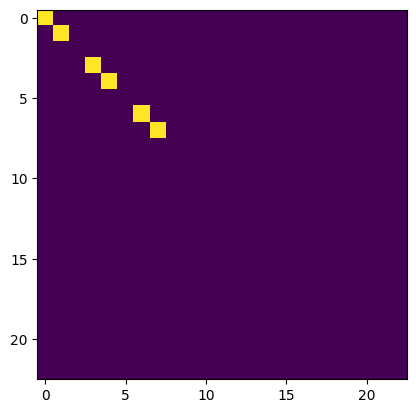

In [16]:
H_shape_vis = np.full((3 * t + ns + v, 3 * t + ns + v), False, dtype=bool)

for i in range(3 * t):
    if (i + 1) % 3 != 0:
        H_shape_vis[i, i] = True

plt.figure()
plt.imshow(H_shape_vis)
plt.show()

In [17]:
f = np.zeros((3 * t + ns + v, 1))

for i in range(3 * t + ns):
    f[i, 0] = c1

for i in range(3 * t + ns, 3 * t + ns + v, 1):
    f[i, 0] = c2

print(f'f: ')
display(f.T)

f: 


array([[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]])

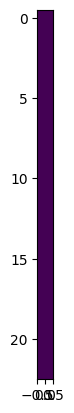

In [18]:
f_shape_vis = np.zeros((3 * t + ns + v, 1))

for i in range(3 * t + ns):
    f_shape_vis[i, 0] = True

for i in range(3 * t + ns, 3 * t + ns + v, 1):
    f_shape_vis[i, 0] = True

plt.figure()
plt.imshow(f_shape_vis)
plt.show()

In [19]:
import numpy as np





tmp = 84

A = np.zeros((tmp, 3 * t + ns + v))
b = np.zeros((tmp, 1))
count = 0  # 制約条件の行数カウンタ


# POINTWISE CONSTRAINTS
for i in range(t):
    k = 3 * i
    for j in range(l[i]):
        A[j + count, k] = -2 * L[i][j, 0] * L[i][j, 2]
        A[j + count, k + 1] = -2 * L[i][j, 1] * L[i][j, 2]
        A[j + count, k + 2] = -2 * L[i][j, 2]
        A[j + count, count + j + 3 * t] = -2
        b[j + count, 0] = -1 - L[i][j, 2]
    count += l[i]


# CONCISTENCY CONSTRAINTS
if v > 0:
    for i in range(t):
        k = 3 * i
        for j in range(s[i]):
            A[j + count, k] = S[i, j, 0]
            A[j + count, k + 1] = S[i, j, 1]
            A[j + count, k + 2] = 1
            b[j + count, 0] = 1
            A[j + count + s[i], k] = - S[i, j, 0]
            A[j + count + s[i], k + 1] = - S[i, j, 1]
            A[j + count + s[i], k + 2] = - 1
            b[j + count + s[i], 0] = 0

        #     print(f'j + count: {j + count}')
        #     print(f'j + count + s[i]: {j + count + s[i]}')
        # print()

        count += 2 * s[i]


# LOGICAL CONSTRAINTS
if v > 0:
    for i in range(v):
        k = 3 * i
        for j in range(u):
            A[j + count, k] = U[j, 0]
            A[j + count, k + 1] = U[j, 1]
            A[j + count, k + 2] = 1
            A[j + count, k + 3] = -U[j, 0]
            A[j + count, k + 4] = -U[j, 1]
            A[j + count, k + 5] = -1
            A[j + count, 3 * t + ns + i] = -1
            b[j + count, 0] = 0

            print(f'k: {k, k+1, k+2, k+3, k+4, k+5}')
            print(f'3*t+ns+i: {3*t+ns+i}')
            print()

        count += u

k: (0, 1, 2, 3, 4, 5)
3*t+ns+i: 21

k: (0, 1, 2, 3, 4, 5)
3*t+ns+i: 21

k: (0, 1, 2, 3, 4, 5)
3*t+ns+i: 21

k: (0, 1, 2, 3, 4, 5)
3*t+ns+i: 21

k: (0, 1, 2, 3, 4, 5)
3*t+ns+i: 21

k: (0, 1, 2, 3, 4, 5)
3*t+ns+i: 21

k: (3, 4, 5, 6, 7, 8)
3*t+ns+i: 22

k: (3, 4, 5, 6, 7, 8)
3*t+ns+i: 22

k: (3, 4, 5, 6, 7, 8)
3*t+ns+i: 22

k: (3, 4, 5, 6, 7, 8)
3*t+ns+i: 22

k: (3, 4, 5, 6, 7, 8)
3*t+ns+i: 22

k: (3, 4, 5, 6, 7, 8)
3*t+ns+i: 22



In [20]:
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8,0.8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.6,-1.6,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.8,-1.4,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.2,0.6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.2,0.8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,-0.4,-1.6,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,-1.4,-1.2,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0


In [21]:
pd.DataFrame(b)

,0
0,0.0
1,0.0
2,-2.0
3,-2.0
4,0.0
5,0.0
6,-2.0
7,-2.0
8,0.0
9,0.0


In [29]:
from cvxopt import matrix
from cvxopt.solvers import qp

P = matrix(H)
q = matrix(f)
G = matrix(A)
h = matrix(b)

sol = qp(P=P, q=q, G=G, h=h)

     pcost       dcost       gap    pres   dres
 0: -5.6126e+00  1.4832e+01  3e+02  3e+00  2e+00
 1:  2.7744e+01 -9.5758e+00  4e+01  4e-16  1e-15
 2:  1.6610e+01  1.0349e+01  6e+00  2e-16  9e-16
 3:  1.4773e+01  1.2608e+01  2e+00  2e-16  3e-15
 4:  1.3913e+01  1.3586e+01  3e-01  2e-16  6e-15
 5:  1.3755e+01  1.3733e+01  2e-02  2e-16  3e-14
 6:  1.3742e+01  1.3741e+01  3e-04  2e-16  6e-14
 7:  1.3741e+01  1.3741e+01  3e-06  2e-16  4e-14
Optimal solution found.


In [30]:
sol

{'x': <23x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <84x1 matrix, tc='d'>,
 'z': <84x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 2.8075770490943867e-06,
 'relative gap': 2.0431482829237698e-07,
 'primal objective': 13.741428589345128,
 'dual objective': 13.741425781768077,
 'primal infeasibility': 1.6273792271313773e-16,
 'dual infeasibility': 3.979653429625518e-14,
 'primal slack': 7.533222348535456e-09,
 'dual slack': 8.864810276976008e-09,
 'iterations': 7}

In [38]:
print(sol['x'])

[ 2.60e-08]
[ 2.22e-07]
[-5.79e-08]
[-3.66e-06]
[ 1.49e-06]
[ 3.01e-06]
[-1.11e+00]
[ 3.70e-01]
[ 9.26e-01]
[ 6.40e-08]
[ 4.96e-08]
[ 1.00e+00]
[ 1.00e+00]
[ 3.10e-06]
[ 1.41e-06]
[ 1.00e+00]
[ 1.00e+00]
[ 5.56e-01]
[ 3.70e-02]
[ 7.41e-02]
[ 3.70e-01]
[ 2.16e-08]
[ 5.90e-09]



# $p_j(\bold x)$ はそのまま

$$p_j(\bold x) = \omega_{j1} x_1 + \omega_{j2} x_2 + b_j$$